# Purpose: Approximately integrate methane emissions starting from 1750, and compare to data

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf
# from scipy.optimize import curve_fit
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CH4')

Read two input files separately and assign the year values and methane concentration data

In [2]:
df1 = pd.read_excel('heat18parameters04jan.xlsx')
df1.to_csv('heat18parameters04jan.csv',header=False,index=False)
df1 = pd.read_csv('heat18parameters04jan.csv')

df2 = pd.read_excel('heat17-ch4-1-2017dec14.xlsx') # results of excel sheet from code of radiative forcing
df2.to_csv('heat17-ch4-1-2017dec14.csv',header=False,index=False)
df3 = pd.read_csv('heat17-ch4-1-2017dec14.csv')
df3.drop(df3.index[[-1]],inplace=True)

Rename the files

In [3]:
out1 = 'historical'
out2 = 'ch4'
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] # abbreviations for months to insert in output file name
date = datetime.date.today().strftime("%Y-%m-%d")
date_split = date.split('-') # split the date string we create by symbol "-"
yrs = str(int(date_split[0])-2000) # real years minus 2000
seq = [out1, yrs, out2,months[int(date_split[1])-1],date_split[2]]
seperator = ','
filename = seperator.join(seq).replace(',', '')

In [4]:
b9 = df1.iloc[8,0:4]
ch40 = df1.iloc[18,2]
ndrop = 1749
df4 = df3.iloc[ndrop:]
df4.index = np.arange(0, len(df4))
print (df4)

    Julian                 ppb
0     1750   742.5796049119058
1     1751   742.1584623598503
2     1752   741.9478910838226
3     1753   742.0531767218364
4     1754   742.2637479978641
5     1755   742.5796049119058
6     1756   743.0007474639614
7     1757   743.5271756540308
8     1758   744.2641751201279
9     1759   745.0011745862251
10    1760     745.94874532835
11    1761   747.0016017084888
12    1762   748.1597437266415
13    1763    749.528457020822
14    1764   751.0024559530162
15    1765   752.6870261612385
16    1766   754.3715963694606
17    1767   756.0561665776827
18    1768   757.7407367859048
19    1769   759.4253069941268
20    1770    761.004591564335
21    1771   762.3733048585156
22    1772   763.6367325146821
23    1773   764.6895888948209
24    1774   765.3213027229042
25    1775   765.7424452749597
26    1776   765.8477309129736
27    1777   765.7424452749597
28    1778   765.6371596369459
29    1779   765.4265883609181
..     ...                 ...
238   19

In [5]:
life = b9[3]  # (* from heat17ch4emissions14dec.nb *)
life = float(life)
eps = life/float(b9[2])
print(float(b9[2]))
print(life)

def x(t):
    y = (t - float(b9[1]))/float(b9[2])
    return y
x = np.vectorize(x)

def u(t):
    y = 1/(1 + np.exp(-x(t)))
    return y

x0 = (1750 - float(b9[1]))/float(b9[2])
u0 = 1/(1 + np.exp(-x0))
print (float(b9[0]))

def ch4fit(t):
#     y = float(ch40) + life*float(b9[0])*u(t)*(1-eps*(1-u(t))-eps**2*(1-u(t))*(1-2*u(t)))-life*float(b9[0])*u0*(1-eps*(1-u0)-eps**2*(1-u0)*(1-2*u0))
    y = float(ch40) + life*float(b9[0])*u(t)*(1-eps*(1-u(t))+eps**2*(1-u(t))*(1-2*u(t)))-life*float(b9[0])*u0*(1-eps*(1-u0)+eps**2*(1-u0)*(1-2*u0))
#     y = float(ch40) + life*(1/float(b9[0]))*u(t)*(1-eps*(1-u(t))+eps**2*(1-u(t))*(1-2*u(t)))-life*(1/float(b9[0]))*u0*(1-eps*(1-u0)+eps**2*(1-u0)*(1-2*u0))
    return y
print(float(ch40))
print(u0*(1-eps*(1-u0)+eps**2*(1-u0)*(1-2*u0)))

41.3836
9.51428
176.655
722.065
0.003662804020792513


In [6]:
t0 = ndrop + 1
tmax = 2017
t = range(t0,tmax+1)

t1 = 1950
q = eval('ch4fit(t1)')
print (q)

t1 = 1750
q1 = eval('ch4fit(t1)')
print (q1)

1236.8282700490856
722.065


Plot final results

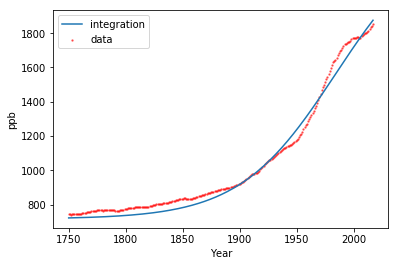

In [7]:
df4 = df4.astype(float)
df4.plot.scatter(x='Julian',y='ppb',s=2,color = 'r', alpha = 0.5,label ='data',marker='o')
y = ch4fit(t)
plt.plot(t,y,label="integration")
plt.legend(loc='best')
plt.xlabel('Year')
plt.savefig('ch4010.eps',dpi=1000)
plt.savefig('ch4010.pdf',dpi=1000)
plt.show()

In [8]:
ch4data = df4['ppb']
yrsuse = pd.DataFrame({'<CH4>ppbv':t})
ch4data = pd.DataFrame({'historical':ch4data})
ch4fitout = pd.DataFrame({'for CESM':y})
df5 = pd.merge(yrsuse, ch4data,left_index =True, right_index =True,how='outer')
df6 = pd.merge(df5, ch4fitout,left_index =True, right_index =True,how='outer')
print (df6)

df6.loc[-1]=['Year','Data','Fit'] # add an another header
df6.index = df6.index+1 
df6 = df6.sort_index() # reorder rows by sorting their index number in an ascending way
df6.loc[(len(df6))] = ['2018/6/29','heatch4forcing05mayhui.nb',''] # add a footer
df6.to_csv(filename + '.csv', index=False)

     <CH4>ppbv   historical     for CESM
0         1750   742.579605   722.065000
1         1751   742.158462   722.214946
2         1752   741.947891   722.368529
3         1753   742.053177   722.525835
4         1754   742.263748   722.686956
5         1755   742.579605   722.851981
6         1756   743.000747   723.021005
7         1757   743.527176   723.194124
8         1758   744.264175   723.371436
9         1759   745.001175   723.553042
10        1760   745.948745   723.739044
11        1761   747.001602   723.929548
12        1762   748.159744   724.124662
13        1763   749.528457   724.324495
14        1764   751.002456   724.529162
15        1765   752.687026   724.738777
16        1766   754.371596   724.953458
17        1767   756.056167   725.173326
18        1768   757.740737   725.398506
19        1769   759.425307   725.629124
20        1770   761.004592   725.865309
21        1771   762.373305   726.107194
22        1772   763.636733   726.354916
23        1773  